In [75]:
import numpy as np
import pandas as pd

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
data = pd.read_csv('train_house_price.csv')

In [78]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [79]:
print(data.isnull().sum())

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64


In [80]:
data.dropna(inplace = True )

In [81]:
data = pd.get_dummies(data, drop_first=True)

In [82]:
data.head()

,beds,baths,size,lot_size,zip_code,price,lot_size_units_sqft
0,3,2.5,2590.0,6000.00,98144,795000.0,True
1,4,2.0,2240.0,0.31,98106,915000.0,False
2,4,3.0,2040.0,3783.00,98107,950000.0,True
3,4,3.0,3800.0,5175.00,98199,1950000.0,True
5,2,2.0,1190.0,1.00,98107,740000.0,False


In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [84]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['beds']), remainder='passthrough')

In [85]:
data.head()

,beds,baths,size,lot_size,zip_code,price,lot_size_units_sqft
0,3,2.5,2590.0,6000.00,98144,795000.0,True
1,4,2.0,2240.0,0.31,98106,915000.0,False
2,4,3.0,2040.0,3783.00,98107,950000.0,True
3,4,3.0,3800.0,5175.00,98199,1950000.0,True
5,2,2.0,1190.0,1.00,98107,740000.0,False


In [86]:
X = data.drop(columns=['price'])
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
x_train.head()

,beds,baths,size,lot_size,zip_code,lot_size_units_sqft
1337,3,2.5,1010.0,570.00,98118,True
327,3,2.0,2130.0,4850.00,98107,True
190,2,3.0,1824.0,0.37,98101,False
527,3,2.5,2150.0,0.32,98116,False
915,2,1.0,800.0,6946.00,98125,True


In [88]:
y_train.head()

1337     615000.0
327      990200.0
190     2458000.0
527     1360000.0
915      550000.0
Name: price, dtype: float64

In [89]:
import seaborn as sns

<Axes: >

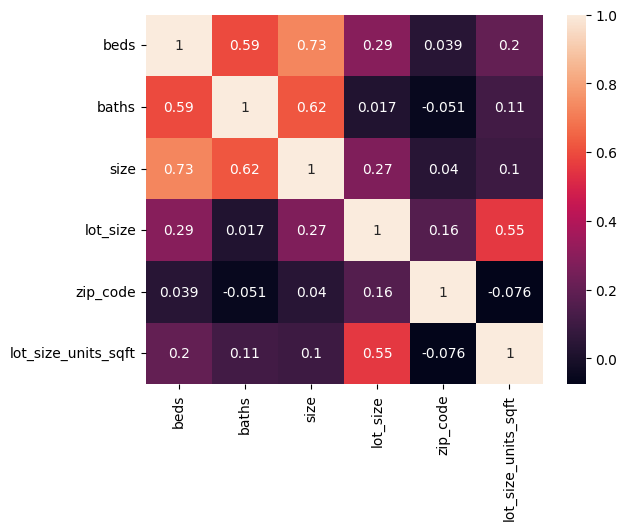

In [90]:
sns.heatmap(X.corr(),annot=True)

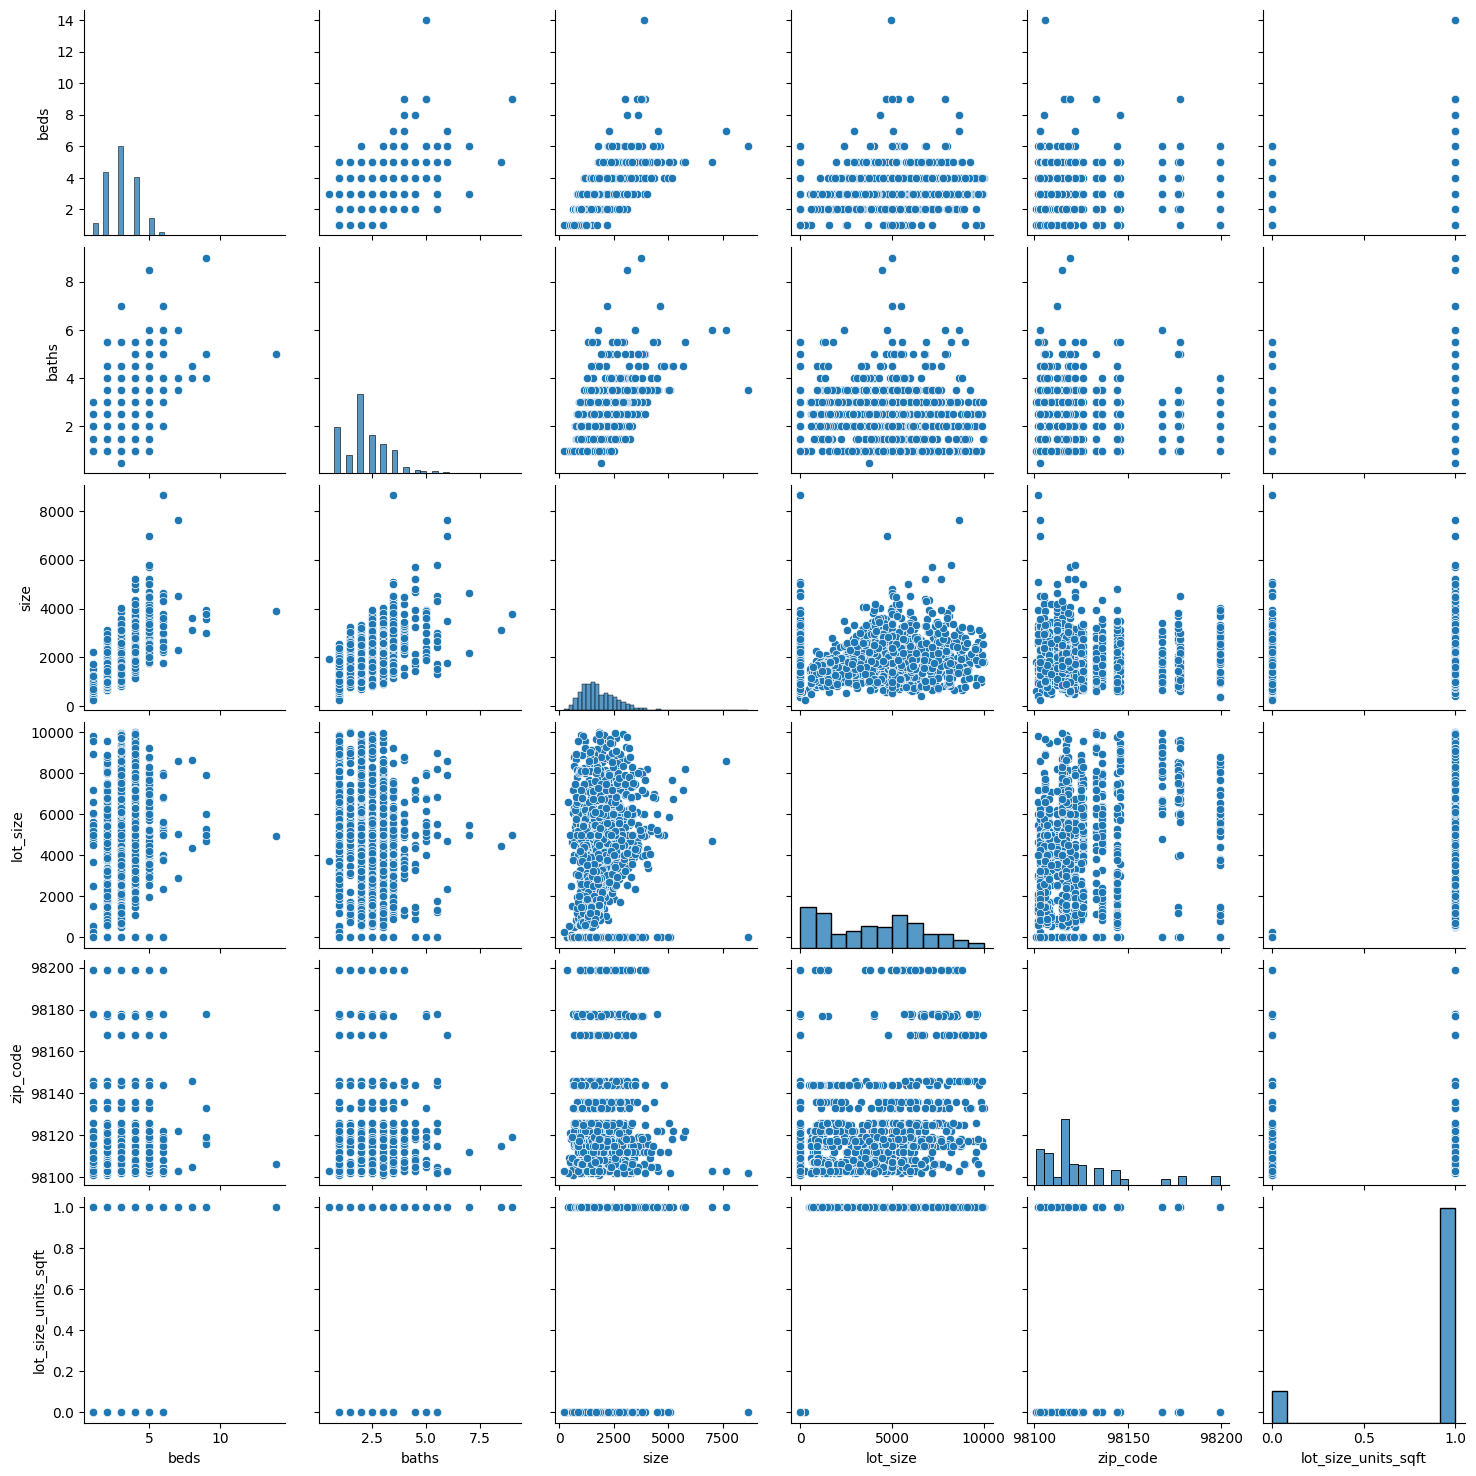

In [91]:
sns.pairplot(x_train)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X being feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

lr = LinearRegression()
lr.fit(X_scaled, y_train)

LinearRegression()

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
y_pred=lr.predict(x_test)
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 250210.54956732513
R2 Score: 0.5970269907700858


In [95]:
print(f"The root mean squared error is {np.sqrt(mse)}")

The root mean squared error is 500.2105052548628


In [99]:
x_new=scaler.transform([[2,1.0,800.0,6946.00,98125,True]])

C:\Users\Chilla Likhita\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [100]:
predicted_value=lr.predict(x_new)

In [101]:
print(f"The predicted house price is {predicted_value[0]}")

The predicted house price is 542119.2635586716
